# Simulation Open Loop 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

## Parameters

In [3]:
TSim = 450
Ts = 0.1
MVPath = {0: 1, 239:0 , TSim: 0}
N = int(TSim/Ts) + 1


# Graphical methods
## Values 



In [4]:
import math 
t1= 42
t2=61

Tg_graph= 139
Tu_graph= 5

a_graph=0.09
Kp_graph= 0.38

e= np.exp(1) # exponetiel

s = np.linspace(0, 400, 1000)

## Broida model

First Order plus delay

## Broida 1

In [5]:
T_brd1=Tg_graph 
theta_brd1 = Tu_graph
print("T_brd1= ",T_brd1)
print("theta_brd1 = ",theta_brd1)

T_brd1 139
theta_brd1 5


(0.0, 450.0)

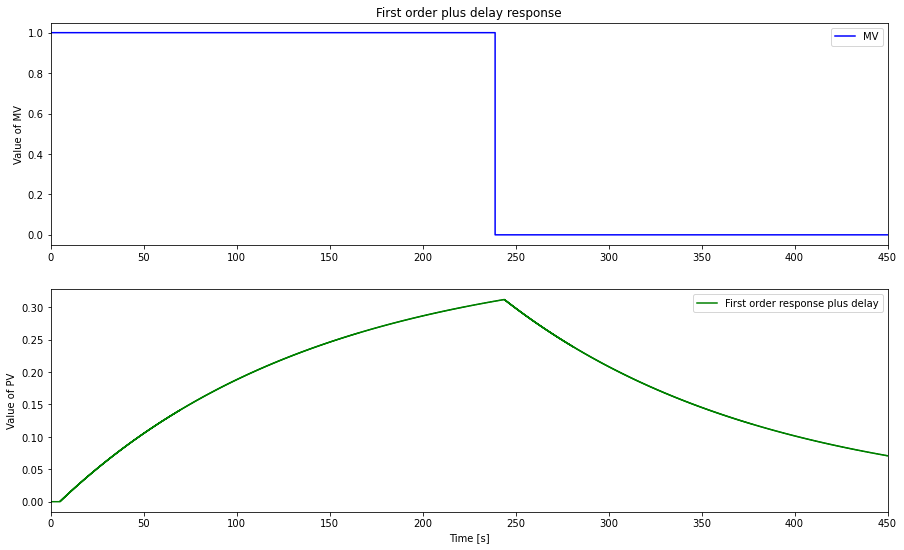

In [6]:
t = []
MV = []

# Parameters
Kp = Kp_graph
T = T_brd1
theta = theta_brd1

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PV_broida1=PV    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

## Broida 2:

In [7]:
T_brd2= 5.5*(t2-t1)
theta_brd2=(2.8*t1)-(1.8*t2)
print ("T_brd2: ", T_brd2)
print ("theta_brd2: ", theta_brd2)

T_brd2:  104.5
theta_brd2:  7.799999999999997


(0.0, 450.0)

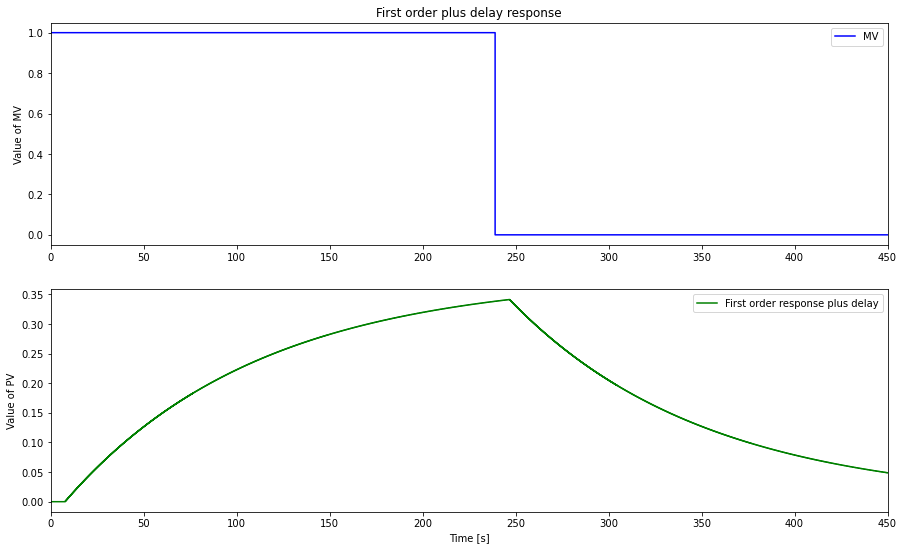

In [8]:
t = []
MV = []

# Parameters
Kp = Kp_graph
T = T_brd2
theta = theta_brd2

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PV_broida2=PV    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   

## van der Grinten model
Second order plus delay


In [9]:
T1_vdg= Tg_graph*((3*a_graph*e)-1)/(1+(a_graph*e))
T2_vdg= Tg_graph*(1-(a_graph*e))/(1+(a_graph*e))

theta_graph_vdg = Tu_graph-((T1_vdg*T2_vdg)/(T1_vdg+3*T2_vdg))

print ("theta vdg:",theta_graph_vdg, "\nT1 vdg: ",T1_vdg,"\nT2 vdg: ", T2_vdg)



theta vdg: 16.2221492501655 
T1 vdg:  -29.713590739131522 
T2 vdg:  84.35679536956576


In [10]:
if T1_vdg<0 or T2_vdg<0:
    print ('T1 or T2 is a negative value Van der Grinten model is not suitable for the results.')
else:
    t = []
    MV = []
    
    # Parameters
    Kp = Kp_graph
    theta = theta_graph_vdg
    T1 = T1_vdg
    T2 = T2_vdg
    
    # MV is created from MVPath
    for i in range(0,N):
        t.append(i*Ts)
        SelectPath_RT(MVPath,t,MV)
        
    PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
    PVSOPDT_van_der_grinten=PVSOPDT
    
    plt.figure(figsize = (15,9))
    
    plt.subplot(2,1,1)
    plt.step(t,MV,'b-',label='MV',where='post')
    plt.ylabel('Value of MV')
    plt.title('Second order plus delay response')
    plt.legend(loc='best')
    plt.xlim([0, TSim])
    
    plt.subplot(2,1,2)
    plt.step(t,PVSOPDT,'g-',label='Van der Grinten, Second order response plus delay',where='post')
    plt.ylabel('Value of PV')
    plt.xlabel('Time [s]')
    plt.legend(loc='best')
    plt.xlim([0, TSim])    

T1 or T2 is a negative value Van der Grinten model is not suitable for the results.


## Strejc model

PS(s) = KP e^−θs/(T s + 1)^n
n order with delay

In [11]:
print ("Tu/Tg : ", Tu_graph/Tg_graph)
bn= 1.00
an= 0.00

T_strecj=Tg_graph/bn
T_uth= an*Tg_graph

theta_strecj = Tu_graph-T_uth

print ("T strecj : ",T_strecj,"\nT uth : ",T_uth, "\ntheta strecj : ", theta_strecj )
PS = (Kp*np.exp(-theta*s))/((T*s+1)**2)





Tu/Tg :  0.03597122302158273
T strecj :  139.0 
T uth :  0.0 
theta strecj :  5.0


(0.0, 450.0)

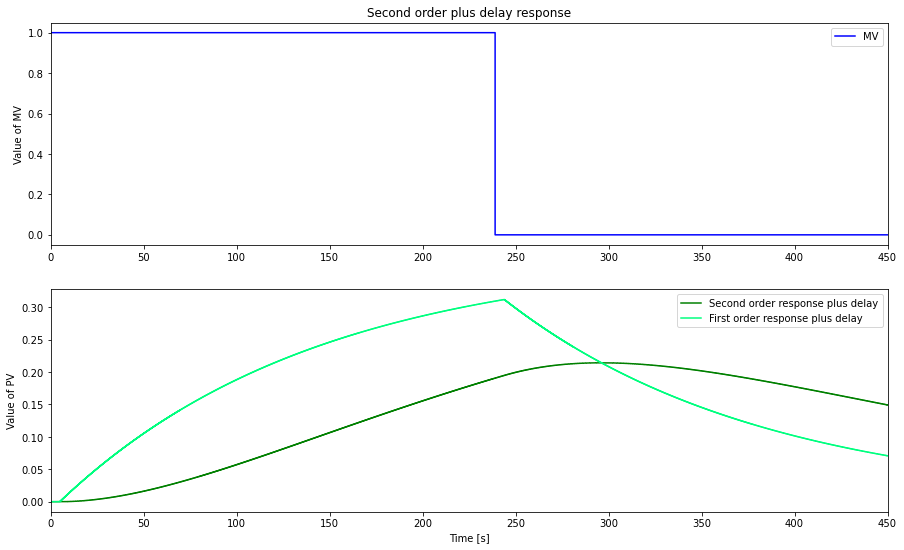

In [12]:
t = []
MV = []

# Parameters
Kp = Kp_graph
theta = theta_strecj
T1 = T_strecj
T2 = T_strecj

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
PVSOPDT_strecj = PVSOPDT
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.step(t,PVFOPDT,'springgreen',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

 # Real data

In [13]:
nameFile = 'Open_loop_experiment_on_MV_2023-03-14-09h30.txt' 
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t_r = data['t'].values - data['t'].values[0]
MV_r = data['MV'].values
PV_r = data['PV'].values
DV_r = data['DV'].values


FileNotFoundError: [Errno 2] No such file or directory: 'Data/Open_loop_experiment_on_MV_2023-03-14-09h30.txt'

(45.0, 55.0)

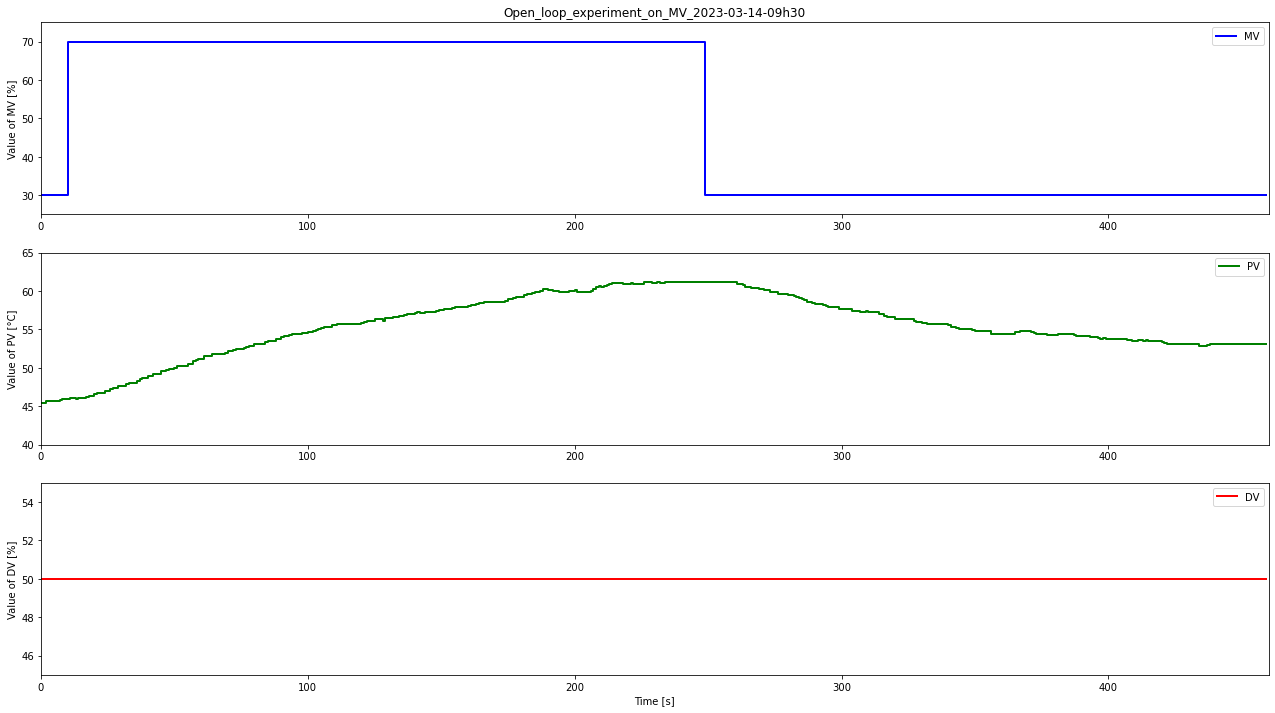

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t_r,MV_r)
l2.set_data(t_r,PV_r)
l3.set_data(t_r,DV_r)

ax1.set_xlim(0, t_r[-1]+1)
ax2.set_xlim(0, t_r[-1]+1)
ax3.set_xlim(0, t_r[-1]+1)

ax1.set_ylim(myRound(np.min(MV_r),5)-5, myRound(np.max(MV_r),5)+5)
ax2.set_ylim(myRound(np.min(PV_r),5)-5, myRound(np.max(PV_r),5)+5)
ax3.set_ylim(myRound(np.min(DV_r),5)-5, myRound(np.max(DV_r),5)+5)

In [ ]:

tstep = np.argwhere(np.diff(MV_r) != 0)
tstep = tstep[0][0]
tm = t_r[tstep:]
tm = tm - tm[0]    
MVstep = MV_r[tstep + 1] - MV_r[tstep]
MVm = MV_r[tstep:]
PVm = PV_r[tstep:]
PVm = (PVm - PVm[0])/MVstep
MVm = (MVm - MVm[0])/MVstep    


(0.0, 451.0)

<Figure size 1584x1584 with 0 Axes>

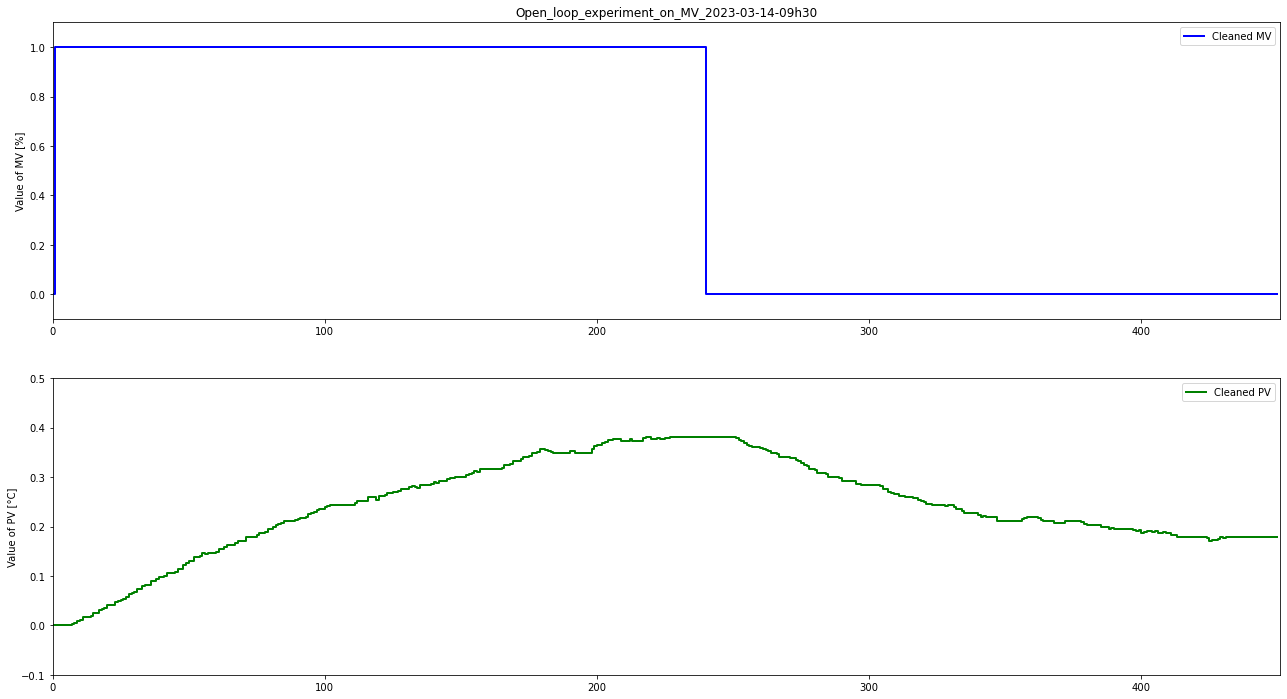

In [ ]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)


l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(tm,MVm)
ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
 

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Numerical methods :

Second order plus delay

(0.0, 450.0)

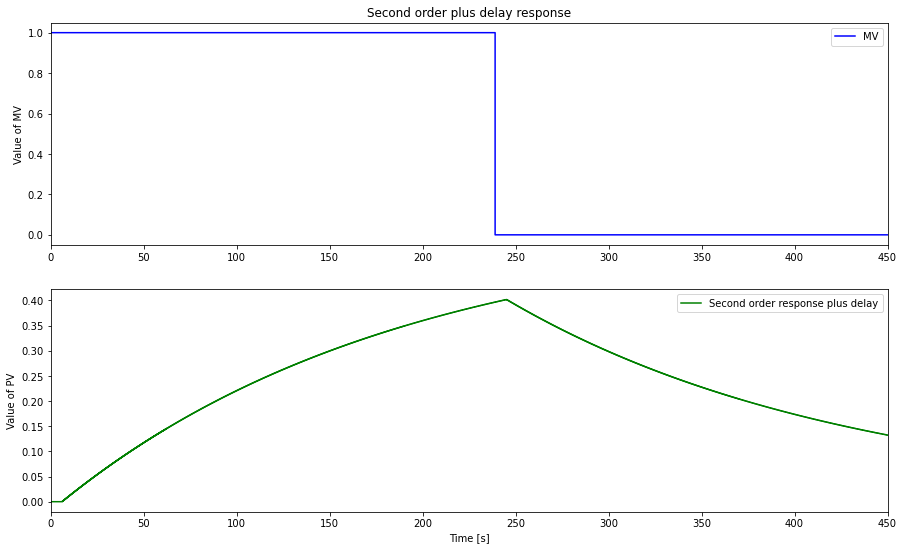

In [ ]:
t = []
MV = []

# Parameters
Kp = 0.5533580402010314
theta = 6.193369063828597
T1 = 184.5046840951011
T2 = 1.7824360575108777e-07

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    

PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
PVSOPDT_Num=PVSOPDT

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

First order plus delay

(0.0, 450.0)

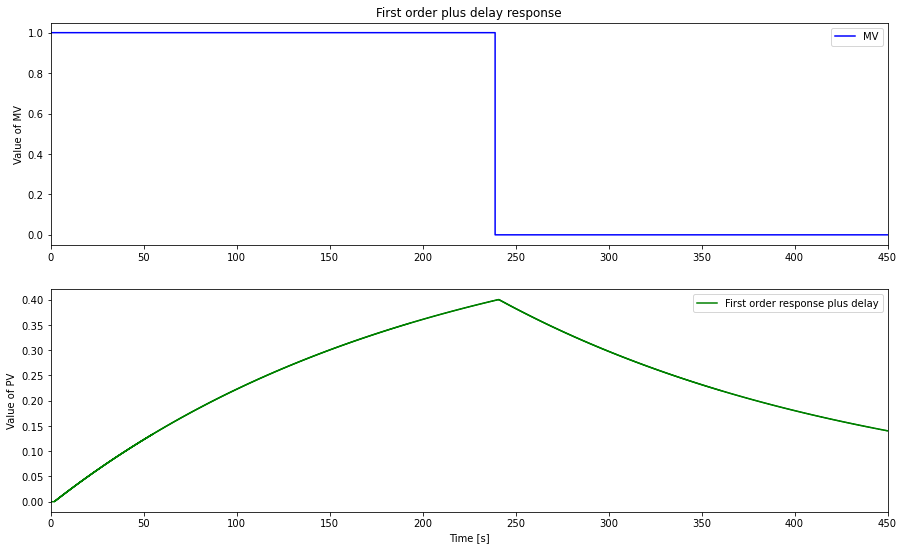

In [ ]:
t = []
MV = []

# Parameters
Kp = 0.5735328853119709
T = 199.41648730815996
theta = 1.9282492101435196

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PVFOPDT_Num=PV

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# Graph

Van der Grinten model does not exist


(0.0, 450.0)

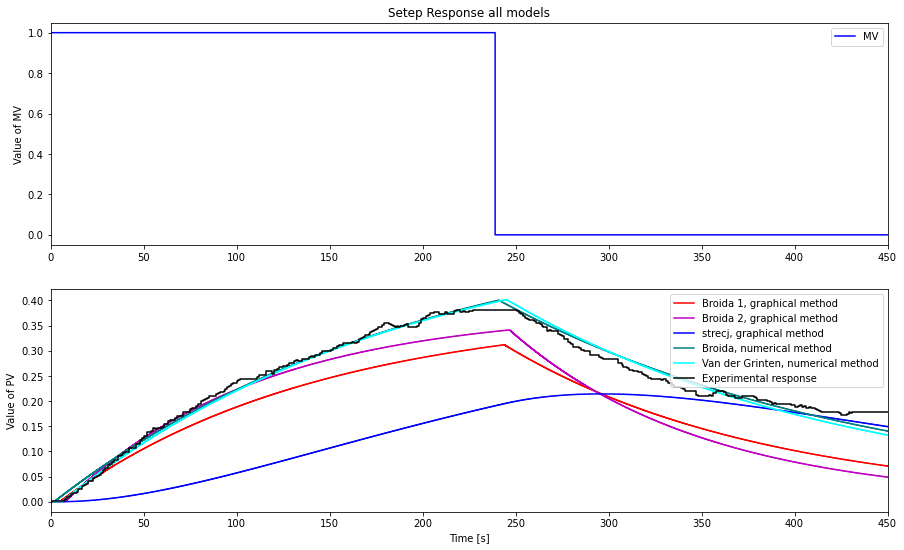

In [ ]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Setep Response all models')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_broida1,'r-',label='Broida 1, graphical method',where='post')
plt.step(t,PV_broida2,'m-',label='Broida 2, graphical method',where='post')
try :
    plt.step(t,PVSOPDT_van_der_grinten,'gold',label='van der Grinten, graphical method',where='post')
except :
    print('Van der Grinten model does not exist')
plt.step(t,PVSOPDT_strecj,'b-',label='strecj, graphical method',where='post')
plt.step(t,PVFOPDT_Num,'teal',label='Broida, numerical method',where='post')
plt.step(t,PVSOPDT_Num,'cyan',label='Van der Grinten, numerical method',where='post')
plt.step(tm,PVm,'k-',label='Experimental response',where='post')


plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

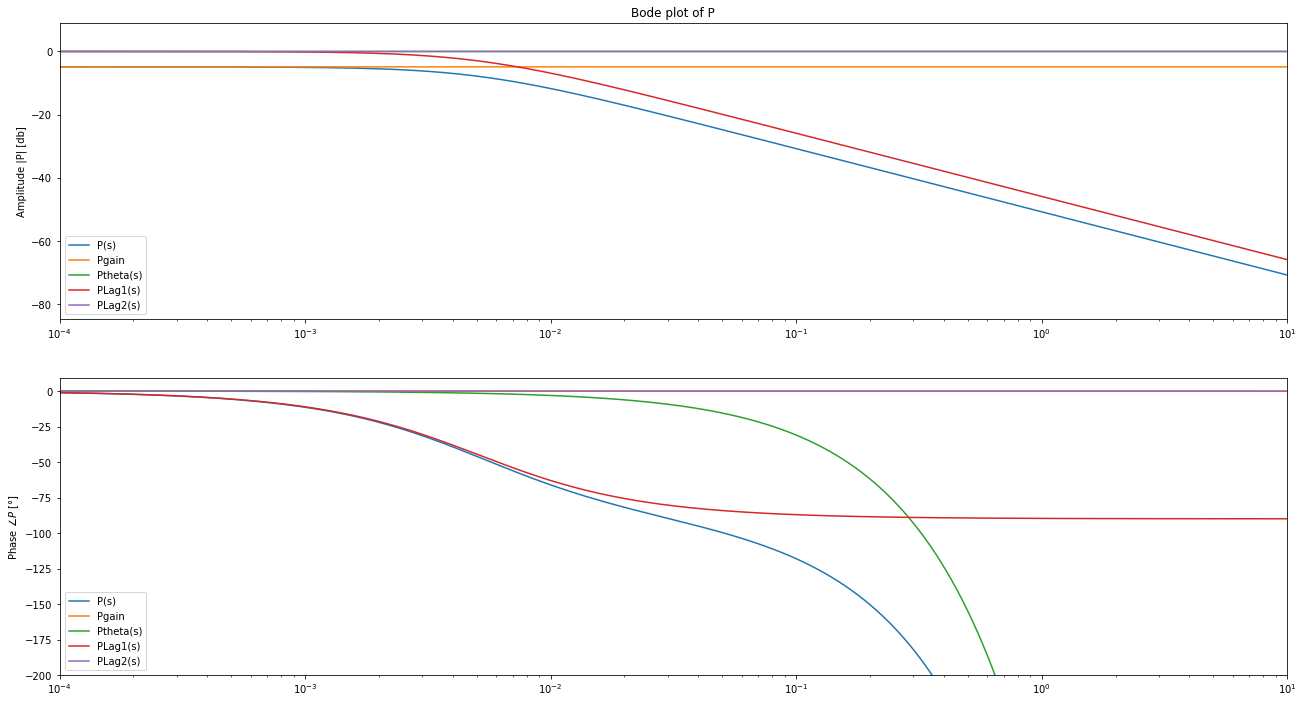

In [ ]:
P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = 0.5707425748689002
P.parameters['Tlag1'] = 196.07639597042842
P.parameters['Tlag2'] = 0.00019390337258466675
P.parameters['theta'] = 5.404503767391171

omega = np.logspace(-4, 1, 10000)

Bode(P,omega)